In [ ]:
#######################################################################################################################
# Project: Deep Virtual Rapport Agent (data analysis)
#
#     Jan Ondras (jo951030@gmail.com)
#     Institute for Creative Technologies, University of Southern California
#     April-October 2019
#
#######################################################################################################################
# Analysis and statistics of the hatice2010 dataset
#######################################################################################################################

In [1]:
#######################################################################################################################
# Get histograms of head gesture durations
#######################################################################################################################

import os
import numpy as np
import glob
import pandas as pd
import scipy.signal
import matplotlib.pyplot as plt
from collections import defaultdict

head_classes = [
    'nod', 
    'shake', 
    'other'
]

hgs = defaultdict(list)

for head_class in head_classes:
    for csv_file in glob.glob('./../../datasets/hatice2010/listener_features/' + head_class + '/*.csv'):
        df = pd.read_csv(csv_file)

        d = float(df.tail(1)[' timestamp'])
        
        
        hgs[head_class].append(d)
        
    

Mean: 1.2696818181818181	 Median: 1.18
Min: 0.38	 Max: 5.282


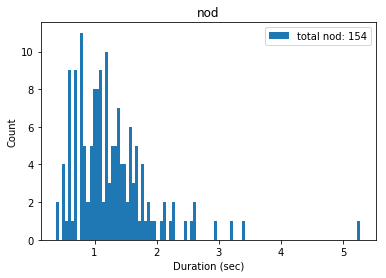

Mean: 1.058423076923077	 Median: 1.03
Min: 0.3	 Max: 3.3810000000000002


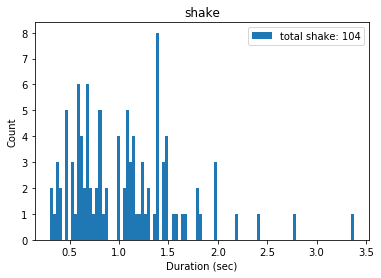

Mean: 5.656160000000001	 Median: 4.24
Min: 1.84	 Max: 34.164


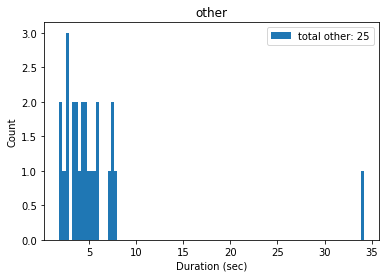

In [2]:
bins_range = 100

for k in hgs.keys():
    print(f'Mean: {np.mean(hgs[k])}\t Median: {np.median(hgs[k])}')
    print(f'Min: {np.min(hgs[k])}\t Max: {np.max(hgs[k])}')
    # Save all durations for overall stats
    np.savez(f'./gesture_durations/{k}_hatice2010', durations=hgs[k])
    plt.figure()
    plt.title(k)
    plt.hist(hgs[k], bins=bins_range, label=f'total {k}: {len(hgs[k])}')
    plt.xlabel('Duration (sec)')
    plt.ylabel('Count')
    plt.legend()
    plt.show()


In [15]:
for k in hgs.keys():
    print(f"total duration of {k}: {np.sum(hgs[k])} seconds")

total duration of nod: 195.531 seconds
total duration of shake: 110.076 seconds
total duration of other: 141.40400000000002 seconds


## Investigate different subjects

Used to manually identify subjects in the dataset (see deep-virtual-rapport-agent/head_gesture_detector/Report_head_gesture_detector.odt).

In [11]:
import os
import numpy as np
import glob
import pandas as pd
import scipy.signal
import matplotlib.pyplot as plt
from collections import defaultdict

head_classes = [
    'nod', 
    'shake', 
    'other'
]

# Identifies session and Operator/User
# E.g. 2009.01.28.15.35.20_Operator for 2009.01.28.15.35.20_Operator_AV_lowQ_sf21778_ef21878
sessids = dict()
sessids['nod'] = set()
sessids['shake'] = set()

# for head_class in head_classes:
for head_class in ['nod', 'shake']:
    for csv_file in glob.glob('./../../datasets/hatice2010/listener_features/' + head_class + '/*.csv'):
#         print(csv_file.split('/')[-1].split('_')[:2])
        sessid = '_'.join(csv_file.split('/')[-1].split('_')[:2])
#         print(sessid)
        sessids[head_class].add(sessid)
        
print(sessids)
print()
print(sorted(sessids['nod']))
print()
print(sorted(sessids['shake']))
print()
print(sorted(sessids['shake'].union(sessids['nod'])))

{'nod': {'2009.05.26.10.19.53_User', '2008.12.05.16.03.15_User', '2008.12.14.14.47.07_Operator', '2009.05.22.15.17.45_User', '2008.12.19.11.03.11_User', '2009.05.25.11.23.09_User', '2009.01.06.14.53.49_User', '2009.01.28.15.35.20_User', '2008.12.05.16.03.15_Operator', '2009.01.28.15.35.20_Operator', '2008.12.14.14.47.07_User'}, 'shake': {'2009.05.26.10.19.53_User', '2009.01.30.12.00.35_Operator', '2008.12.05.16.03.15_User', '2008.12.19.11.03.11_Operator', '2008.12.14.14.47.07_Operator', '2009.05.22.15.17.45_User', '2009.01.06.14.53.49_Operator', '2009.01.30.12.00.35_User', '2008.12.19.11.03.11_User', '2009.01.06.14.53.49_User', '2009.05.25.11.23.09_User', '2009.01.06.12.41.42_Operator', '2009.01.28.15.35.20_User', '2008.12.05.16.03.15_Operator', '2009.01.28.15.35.20_Operator', '2008.12.14.14.47.07_User'}}

['2008.12.05.16.03.15_Operator', '2008.12.05.16.03.15_User', '2008.12.14.14.47.07_Operator', '2008.12.14.14.47.07_User', '2008.12.19.11.03.11_User', '2009.01.06.14.53.49_User', '2009